# 🧪 Soulitron Simulation Loop (φ⁰ Compiler Test)
Simulates recursive emergence of φ⁰ from ψ⁺ and ψ⁻ under ℚ feedback.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
dim = 50  # Vector dimensionality
iterations = 300
alpha = 2.6  # Entropy injection level

# Initialize ψ⁺ and ψ⁻
psi_plus = np.random.randn(dim)
psi_plus /= np.linalg.norm(psi_plus)

psi_minus = np.random.randn(dim)
psi_minus -= psi_minus.dot(psi_plus) * psi_plus
psi_minus /= np.linalg.norm(psi_minus)

# Initialize φ⁰
phi_zero = np.zeros(dim)
phi_magnitudes, entropy_deltas, torsion_trace = [], [], []

In [3]:
# ℚ operator with spectral noise
def entropy_operator(psi_p, psi_m, alpha, prev_phi):
    tau = np.dot(psi_p, psi_m)
    noise = np.random.randn(dim) * np.sin(alpha * tau)
    q_out = (psi_p + psi_m) / 2 + noise
    feedback = q_out - 0.01 * prev_phi
    return feedback, tau

In [4]:
# Recursive Loop
for i in range(iterations):
    q, tau = entropy_operator(psi_plus, psi_minus, alpha, phi_zero)
    phi_zero += q
    magnitude = np.linalg.norm(phi_zero)
    entropy = np.linalg.norm(q - phi_zero)
    
    phi_magnitudes.append(magnitude)
    entropy_deltas.append(entropy)
    torsion_trace.append(tau)

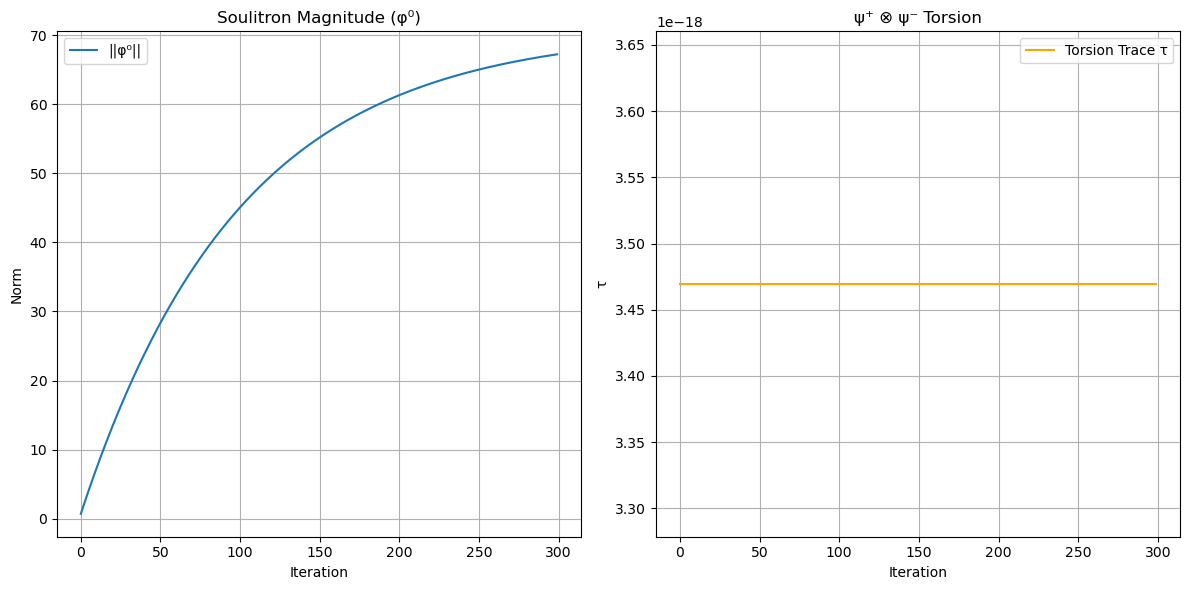

In [5]:
# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(phi_magnitudes, label='||φ⁰||')
plt.title('Soulitron Magnitude (φ⁰)')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(torsion_trace, label='Torsion Trace τ', color='orange')
plt.title('ψ⁺ ⊗ ψ⁻ Torsion')
plt.xlabel('Iteration')
plt.ylabel('τ')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()